<a href="https://colab.research.google.com/github/tytyty93/LazyProgrammer/blob/master/LP_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and Loading the Data

In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Scaling the Data

In [4]:
x_train,x_test = x_train/255, x_test/255
print("x_train shape:",x_train.shape)

x_train shape: (60000, 28, 28)


# Building the Model

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compiling the Model

In [0]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the Model


In [7]:
r = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3017 - accuracy: 0.9122 - val_loss: 0.1363 - val_accuracy: 0.9592
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1430 - accuracy: 0.9580 - val_loss: 0.1036 - val_accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1050 - accuracy: 0.9681 - val_loss: 0.0820 - val_accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0863 - accuracy: 0.9726 - val_loss: 0.0899 - val_accuracy: 0.9720
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0724 - accuracy: 0.9770 - val_loss: 0.0729 - val_accuracy: 0.9792
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0649 - accuracy: 0.9797 - val_loss: 0.0765 - val_accuracy: 0.9779
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0584 - accuracy: 0.9812 - val_loss: 0.0696 - val_accuracy:

In [0]:
import matplotlib.pyplot as plt

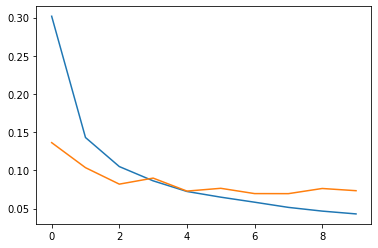

In [11]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

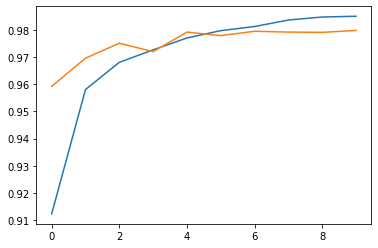

In [9]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'va_acc')

Confusion matrix, without normalization
[[ 967    0    1    1    0    1    4    2    2    2]
 [   0 1121    6    0    0    1    1    1    5    0]
 [   4    0 1014    2    1    0    2    3    6    0]
 [   0    0    7  987    0    4    0    5    3    4]
 [   1    0    5    1  958    0    3    1    2   11]
 [   2    0    0   11    3  870    3    1    1    1]
 [   3    3    0    1    2    3  940    0    6    0]
 [   0    1    8    3    0    0    0 1010    4    2]
 [   6    0    2    1    5    0    0    5  950    5]
 [   2    2    0    2   11    1    0    8    2  981]]


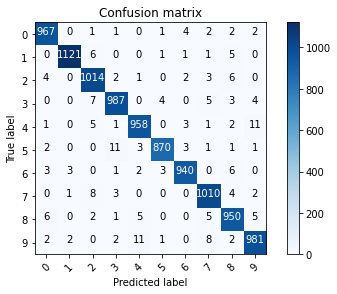

In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


# Showing misclassified examples

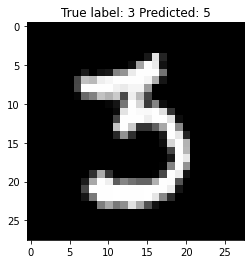

In [20]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));